# Pauli Spin Blockade Plots

Plot the results of whats going on

In [1]:
%matplotlib inline
import local_broom

%load_ext autoreload
%autoreload 2

Added 'quench/' and 'quench/libraries' for easy importing.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from monty import Monty
import paul

### Plot Functions

In [3]:
# 1D plots

def plot_amp_phase(X, amp, phase, name="amp_phase", xlabel="P1 voltage", save=False):
    """Plot both amplitude and phase of a result."""
    fig, (ax0, ax1) = plt.subplots(nrows = 2, sharex = True)

    ax0.plot(X, amp, ".-", color="steelblue")
    ax1.plot(X, phase, ".-", color="orange")
    
    ax0.set_ylabel("Amplitude")
    ax1.set_ylabel("Phase")
    ax0.set_title(monty.plot_title + "." + name)
    ax1.set_xlabel(xlabel)
    
    ax0.grid()
    ax1.grid()
    fig.align_ylabels([ax0, ax1])
    plt.tight_layout()

    if save:
        monty.savefig(plt, name)

def plot_st_fb(X, st_result):

    fig, ax = plt.subplots()
    
    ax.plot(X, st_result[0])
    ax.set_xlabel("P1 voltage (V)")
    ax.set_ylabel("ST amplitude (a.u.)")
    ax.set_title(monty.plot_title + ".st_history")
    plt.tight_layout()
    
    monty.savefig(plt, "st_history")

In [49]:
# 2D plots



### Load the run data

In [14]:
# Load completed run
monty = Monty("rf.psb_best")
print(monty.experiment)

result = monty.loadrun("hyper_j.29")

params = monty.parameters["parameters"]

data = result["data"]

Loading existing experiment (ignoring given experiment parameters)
Note that no experimental data has been loaded.
Next run will have id 33
{'desc': 'Run detuning and J sweeps to see pauli spin blockade'}
Loading 'C:\Users\LD2007\Documents\Si_CMOS_james\data\rf/psb_best\hyper_j.29.xz'


In [10]:
# Load snapshot of run
result = monty.loaddata("hyper_j_3.xz")["data"]
params = monty.parameters

data = result

OSError: ERROR: File doesn't exist 'C:\Users\LD2007\Documents\Si_CMOS_james\data\rf/psb_best\hyper_j_3.xz'

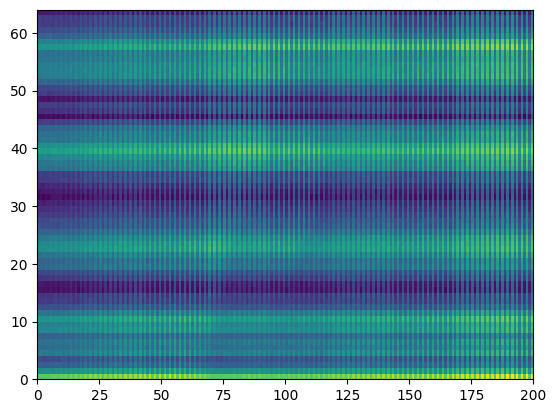

In [233]:
data = result[:64, :]  # crop
plt.pcolormesh(np.abs(data))

In [15]:
ref = data[:, ::2]
mes = data[:, 1::2]

ref_amp = paul.autodb(ref)
ref_phase = paul.autodeg(ref)
mes_amp = paul.autodb(mes)
mes_phase = paul.autodeg(mes)  # add axis for unwrap?

# X axis (p1_steps)
p1_steps = np.linspace(params["amplitude_volts"]["measure_pulse_start"]["P1"],
                       params["amplitude_volts"]["measure_pulse_end"]["P1"],
                       params["averaging"]["num_detuning"])
X = p1_steps
j_steps = np.linspace(params["amplitude_volts"]["measure_pulse_start"]["J"],
                      params["amplitude_volts"]["measure_pulse_end"]["J"],
                      params["averaging"]["num_j"])

### 1D Plots

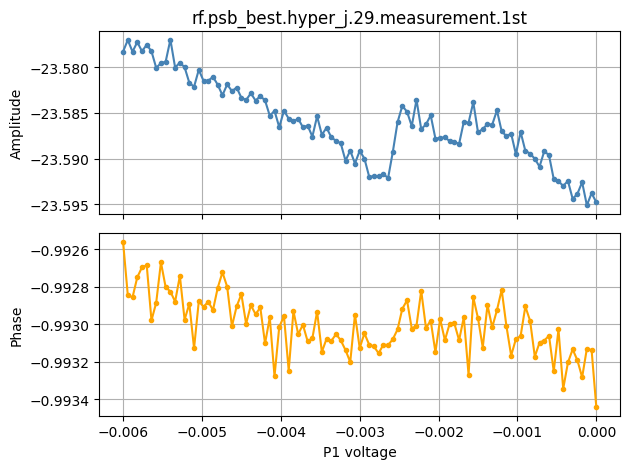

In [16]:
plot_amp_phase(X, mes_amp[0], mes_phase[0],
               name="measurement.1st",
               xlabel="P1 voltage",
               save=True)

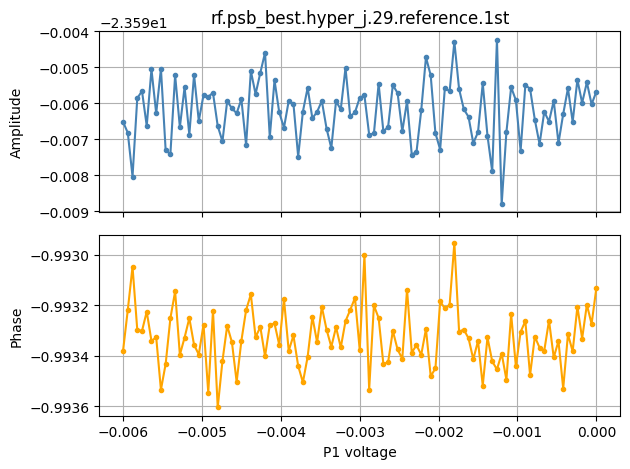

In [17]:
plot_amp_phase(X, ref_amp[0], ref_phase[0],
               name="reference.1st",
               xlabel="P1 voltage",
               save=True)

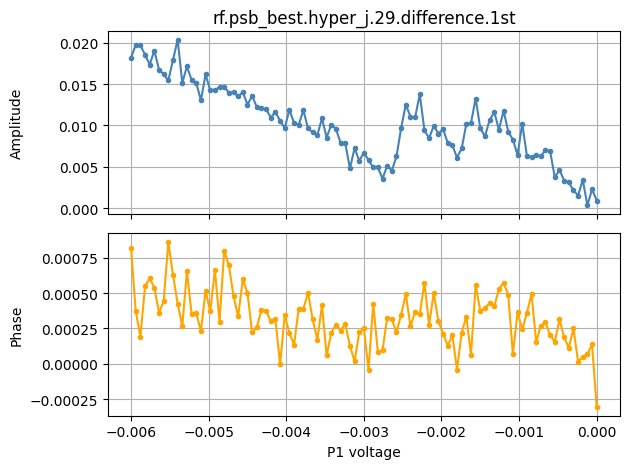

In [18]:
j_run = 0  # which index in j to plot
plot_amp_phase(X, mes_amp[j_run]-ref_amp[j_run], mes_phase[j_run]-ref_phase[j_run],
               name="difference.1st",
               xlabel="P1 voltage",
               save=True)

### 2D Plots

In [236]:
# Note that none of these plots will work if we take no steps in j...

if len(j_steps) < 2:
    raise ValueError("Not enough steps in J for 2D plotting")

In [241]:
j_steps

array([3.35      , 3.3557971 , 3.3615942 , 3.3673913 , 3.37318841,
       3.37898551, 3.38478261, 3.39057971, 3.39637681, 3.40217391,
       3.40797101, 3.41376812, 3.41956522, 3.42536232, 3.43115942,
       3.43695652, 3.44275362, 3.44855072, 3.45434783, 3.46014493,
       3.46594203, 3.47173913, 3.47753623, 3.48333333, 3.48913043,
       3.49492754, 3.50072464, 3.50652174, 3.51231884, 3.51811594,
       3.52391304, 3.52971014, 3.53550725, 3.54130435, 3.54710145,
       3.55289855, 3.55869565, 3.56449275, 3.57028986, 3.57608696,
       3.58188406, 3.58768116, 3.59347826, 3.59927536, 3.60507246,
       3.61086957, 3.61666667, 3.62246377, 3.62826087, 3.63405797,
       3.63985507, 3.64565217, 3.65144928, 3.65724638, 3.66304348,
       3.66884058, 3.67463768, 3.68043478, 3.68623188, 3.69202899,
       3.69782609, 3.70362319, 3.70942029, 3.71521739])

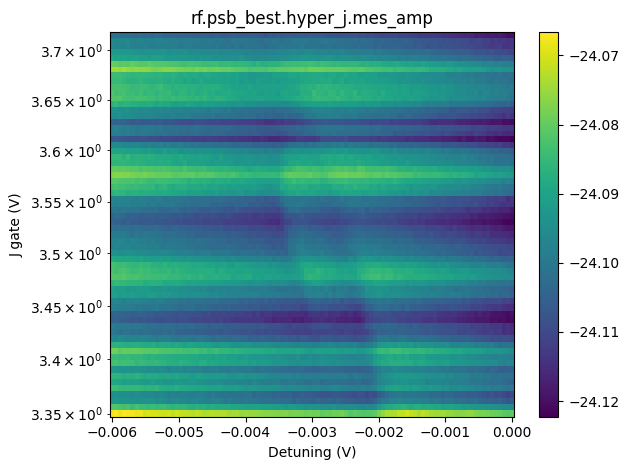

In [242]:
plt.figure()
plt.pcolormesh(X, j_steps, mes_amp, shading="nearest")
plt.colorbar()
plt.ylabel("J gate (V)")
plt.xlabel("Detuning (V)")
plt.semilogy()
plt.title(monty.plot_title + ".mes_amp")
plt.tight_layout()


#monty.savefig(plt, "2d mes amp")

In [244]:
j_steps.dtype

dtype('float64')

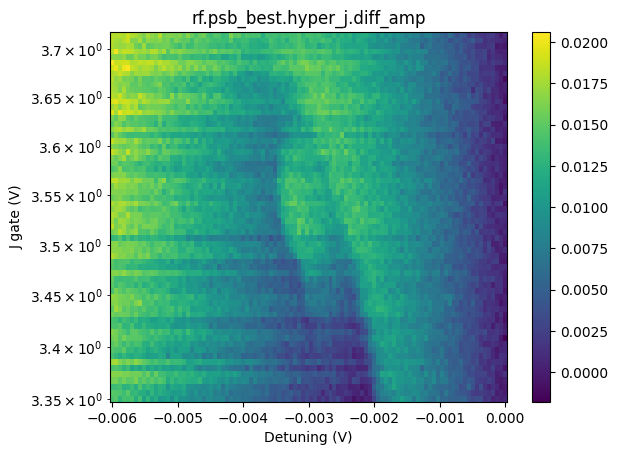

In [249]:
plt.figure()
plt.pcolormesh(X, j_steps, mes_amp-ref_amp, shading="nearest")
plt.colorbar()
plt.ylabel("J gate (V)")
plt.xlabel("Detuning (V)")
plt.semilogy()
plt.title(monty.plot_title + ".diff_amp")

monty.savefig(plt, "2d diff amp")

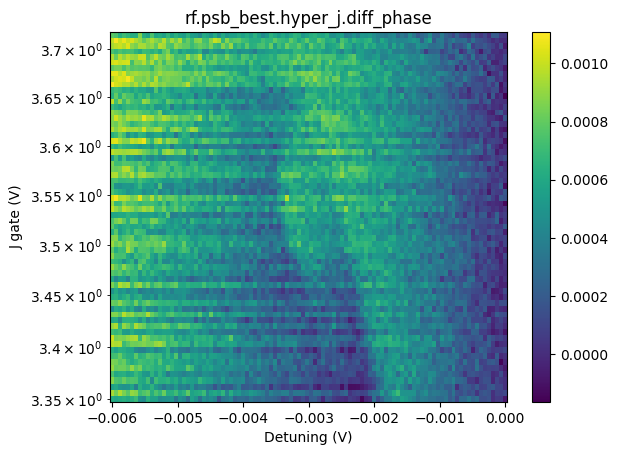

In [248]:
plt.figure()
plt.pcolormesh(X, j_steps, mes_phase-ref_phase, shading="nearest")
plt.colorbar()
plt.ylabel("J gate (V)")
plt.xlabel("Detuning (V)")
plt.semilogy()
plt.title(monty.plot_title + ".diff_phase")

monty.savefig(plt, "2d diff phase")

In [88]:
a = np.arange(1, params["averaging"]["num_detuning"]+1)

In [84]:
params["averaging"]["num_detuning"]

10

In [89]:
a


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [90]:
a.shape

(10,)